<a href="https://colab.research.google.com/github/vipyan/Airbnb_prediction/blob/main/Hairfall_prediction_chat_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Understand and Prepare the Dataset**

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'/content/Predict Hair Fall.csv')

# Display the first few rows of the dataframe
print(df.head(3))


       Id Genetics Hormonal Changes Medical Conditions  \
0  133992      Yes               No            No Data   
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   

  Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                  No Data      Magnesium deficiency  Moderate   19   
1              Antibiotics      Magnesium deficiency      High   43   
2         Antifungal Cream        Protein deficiency  Moderate   26   

  Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   Hair Loss  
0                    Yes                   Yes      No           No          0  
1                    Yes                   Yes      No           No          0  
2                    Yes                   Yes      No          Yes          0  


**Step 2: Data Analysis**

a. General Overview

In [10]:
# Display the shape of the dataset
print("Dataset shape:", df.shape)

# Display basic information about the dataset
df.info()


Dataset shape: (999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 10

b. Descriptive Statistics

In [11]:
# Display descriptive statistics
print(df.describe(include='all'))


                   Id Genetics Hormonal Changes Medical Conditions  \
count      999.000000      999              999                999   
unique            NaN        2                2                 11   
top               NaN      Yes              Yes            No Data   
freq              NaN      522              509                110   
mean    153354.673674      NaN              NaN                NaN   
std      25516.041985      NaN              NaN                NaN   
min     110003.000000      NaN              NaN                NaN   
25%     131867.500000      NaN              NaN                NaN   
50%     152951.000000      NaN              NaN                NaN   
75%     174969.000000      NaN              NaN                NaN   
max     199949.000000      NaN              NaN                NaN   

       Medications & Treatments Nutritional Deficiencies     Stress  \
count                       999                       999       999   
unique           

c. Check for Missing Values

In [12]:
# Check for missing values
print(df.isnull().sum())


Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64


d. Analyze Specific Columns

In [13]:
# Analyze the 'Genetics' column
print(df['Genetics'].value_counts())


Genetics
Yes    522
No     477
Name: count, dtype: int64


**Step 3: Data Cleaning**

In [15]:
# Example: Fill missing values for 'Genetics' with the mode
df['Genetics'].fillna(df['Genetics'].mode()[0], inplace=True)


**Step 4: Visualizing the Data**

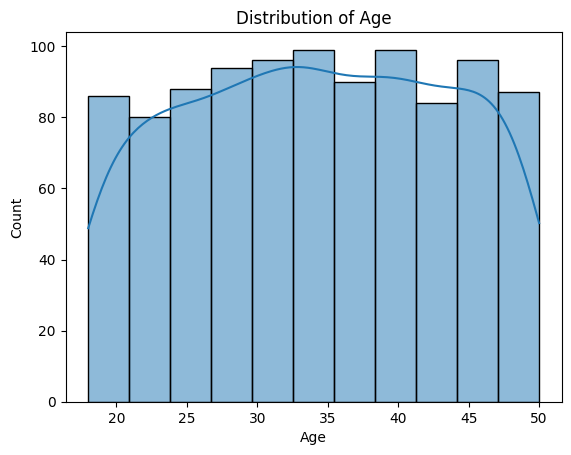

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting distribution of 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


**Deeper Data Exploration and Visualization**

Step 1: Correlation Matrix for Numerical Variables

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
correlation_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


ValueError: could not convert string to float: 'Yes'

In [20]:
# List of columns with binary categorical data
binary_columns = ['Genetics', 'Hormonal Changes', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking', 'Weight Loss']

# Convert these binary categorical variables to numeric (1 for 'Yes', 0 for 'No')
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Now, let's try calculating the correlation matrix again
correlation_matrix = df.corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


KeyError: 'Weight Loss'

In [19]:
# Print all column names in the DataFrame
print(df.columns)



Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')


In [21]:
# Adjusted list of columns with binary categorical data, accounting for trailing spaces
binary_columns = [
    'Genetics',
    'Hormonal Changes',
    'Poor Hair Care Habits ',  # Notice the space at the end
    'Environmental Factors',
    'Smoking',
    'Weight Loss '  # Notice the space at the end
]

# Convert these binary categorical variables to numeric (1 for 'Yes', 0 for 'No')
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Recalculate the correlation matrix with corrected column names
correlation_matrix_corrected = df.corr()

# Plotting heatmap of the corrected correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_corrected, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features (Corrected)')
plt.show()


ValueError: could not convert string to float: 'No Data'